## 10.19对于更新过的参数重新进行聚类分析

In [2]:
import pandas as pd
from IPython.display import display
import numpy as np

from matplotlib import pyplot as plt

In [6]:
data_path = "/Users/jiarui/Study/交通事故/data/vehicle_actions.csv"
df_vehicle = pd.read_csv(data_path)
df_vehicle.columns

Index(['Unnamed: 0', 'index', '唯一标识', '违法时间', '行政区划', '当事人_姓名', '当事人_驾驶证号',
       '当事人_发证机关', '当事人_准驾车型', '机动车_号牌种类', '机动车_号牌种类说明', '机动车_使用性质说明',
       '机动车_号牌号码', '机动车_交通方式', '机动车_交通方式说明', '违法地点', '违法地点_道路类型', '违法地点_路段代码',
       '违法地点_地点米数', '违法地点_违法地址', '违法地点_公路行政等级', '违法行为', '违法行为_违法大类',
       '违法行为_违法小类', '违法行为_违法描述', '违法行为_事故等级', '违法行为记分数', '违法行为罚款金额',
       '违法行为_实测值', '违法行为_标准值', 'trans_code', 'age', 'occur_prob', 'severity',
       'is_local'],
      dtype='object')

### 聚类特征变量选择
基本属性：本地/外来，驾驶车型、年龄；

行为属性：个人在一年内的违章次数、扣分平均数、违章行为造成事故的可能性、潜在的后果严重性、事故等级等；

In [50]:
pd.set_option('display.max_rows', 200)

count = df_vehicle['trans_code'].value_counts()
print(count.head(100))

1    70308
2    62383
3     8787
5     7161
4     6113
6     3257
Name: trans_code, dtype: int64


In [14]:
# 给交通方式编码
df_vehicle['trans_code'] = 0
# print(df_vehicle['机动车_交通方式说明'].str.contains('小型轿车'))
list_1 = ['小型轿车', '面包车']
df_vehicle.loc[df_vehicle['机动车_交通方式说明'].str.contains('小型轿车|面包车'), 'trans_code'] = 1

list_2 = ['货车', '大型轿车', '作业车', '大型专用校车']
df_vehicle.loc[df_vehicle['机动车_交通方式说明'].str.contains('货车|大型轿车|作业车|大型专用校车|有轨电车|手扶变形运输机'), 'trans_code'] = 2

list_3 = ['牵引车', '挂车']
df_vehicle.loc[df_vehicle['机动车_交通方式说明'].str.contains('牵引车|挂车|轮式挖掘机械'), 'trans_code'] = 3

list_4 = ['客车']
df_vehicle.loc[df_vehicle['机动车_交通方式说明'].str.contains('客车'), 'trans_code'] = 4

list_5 = ['摩托车']
df_vehicle.loc[df_vehicle['机动车_交通方式说明'].str.contains('摩托车'), 'trans_code'] = 5

df_vehicle.loc[df_vehicle['机动车_交通方式说明'].str.contains('微型轿车|三轮汽车|残疾人专用车|助力自行车|手推车|其它|拖拉机'), 'trans_code'] = 6

print(df_vehicle[df_vehicle['trans_code'] == 0][['机动车_交通方式说明', '机动车_交通方式']].value_counts())

Series([], dtype: int64)


In [65]:
df_vehicle.loc[df_vehicle['违法行为_违法小类'] == '违反交通信号灯', 'severity'] = 5
df_vehicle.loc[df_vehicle['违法行为_违法小类'] == '违反交通信号灯', 'occur_prob'] = 5


,age,is_local,trans_code,occur_prob,severity,score,fine,accident,counts
当事人_驾驶证号,,,,,,,,,
110101197110121532,42.0,2.0,1.0,1.0,1.0,0.0,100.0,0.0,1
11010119720630005X,41.0,1.0,1.0,1.0,1.0,0.0,50.0,0.0,1
110101197211232039,41.0,1.0,1.0,1.0,1.0,0.0,50.0,0.0,1
11010119740316101X,39.0,1.0,4.0,3.0,3.0,0.0,100.0,0.0,1
110102195901261133,54.0,1.0,4.0,1.0,1.0,3.0,100.0,0.0,1
...,...,...,...,...,...,...,...,...,...
654301197712100819,36.0,1.0,1.0,1.0,1.0,0.0,100.0,0.0,1
654323196502241713,48.0,2.0,1.0,4.0,4.0,0.0,150.0,0.0,1
654323198306140017,30.0,2.0,1.0,1.0,1.0,1.0,20.0,0.0,2


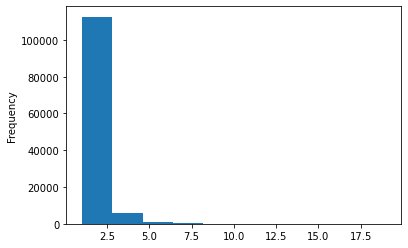

In [19]:
#计算指标
df_calculate = df_vehicle[
    ['当事人_驾驶证号', 'age', 'is_local', 'trans_code', 'occur_prob', 'severity', '违法行为记分数', '违法行为罚款金额', '违法行为_事故等级']]
df_res = df_calculate.groupby('当事人_驾驶证号').agg('mean')
df_res.columns = ['age', 'is_local', 'trans_code', 'occur_prob', 'severity', 'score', 'fine', 'accident']
df_res.index_name = '当事人_驾驶证号'
df_res['counts'] = df_calculate['当事人_驾驶证号'].value_counts()
df_res[df_res['counts'] < 20]['counts'].plot(kind='hist')
# print(df_res.head(1000))
df_res

<AxesSubplot:ylabel='Frequency'>

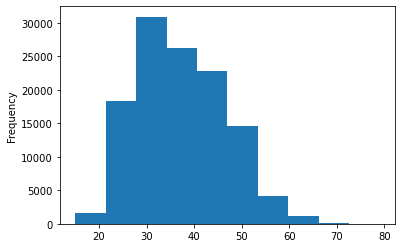

In [22]:
df_res['age'].plot(kind='hist')


In [34]:
# 如果只是df_level=df_res 是浅拷贝，和引用类似，会导致修改原来的值
df_level = df_res.copy(deep=True)
df_level = df_level.round(0)
list_col = df_res.columns
# list_col = ['counts']
for col in list_col:
    if col == 'id' or col == 'trans_code' or col == 'is_local':
        continue
    dfi = df_level[col].copy(deep=True)
    Q1 = df_level[col].quantile(0.25)
    Q2 = df_level[col].quantile(0.5)
    Q3 = df_level[col].quantile(0.75)
    IQR = Q3 - Q1
    Max = Q3 + IQR * 1.5
    Min = Q1 - IQR * 1.5
    if col == 'counts':
        df_level.loc[dfi >= 5, col] = 5
    elif col == 'score':
        df_level.loc[dfi <= 0.5, col] = 1
        df_level.loc[(dfi < 1) & (dfi > 0.5), col] = 2
        df_level.loc[(dfi < 2) & (dfi >= 1), col] = 3
        df_level.loc[(dfi < 3) & (dfi >= 2), col] = 4
        df_level.loc[(dfi < 6) & (dfi >= 3), col] = 5
        df_level.loc[dfi >= 6, col] = 6
    elif col == 'fine':
        df_level.loc[dfi < 50, col] = 1
        df_level.loc[(dfi < 100) & (dfi >= 50), col] = 2
        df_level.loc[(dfi < 150) & (dfi >= 100), col] = 3
        df_level.loc[(dfi < 200) & (dfi >= 150), col] = 4
        df_level.loc[(dfi < 300) & (dfi >= 200), col] = 5
        df_level.loc[dfi >= 300, col] = 6
    elif col == 'age':
        df_level.loc[dfi <= 25, col] = 1
        df_level.loc[(dfi < 35) & (dfi >= 25), col] = 2
        df_level.loc[(dfi < 45) & (dfi >= 35), col] = 3
        df_level.loc[(dfi < 55) & (dfi >= 45), col] = 4
        df_level.loc[dfi >= 55, col] = 5
    elif col == 'accident':
        df_level.loc[dfi == 0, col] = 1
        df_level.loc[(dfi <= 2) & (dfi > 0), col] = 2
        df_level.loc[(dfi <= 4) & (dfi > 2), col] = 3
    # else:
    #     df_level.loc[(dfi < Min) & (dfi >= 0), col] = 1
    #     df_level.loc[(dfi < Q1) & (dfi >= Min), col] = 2
    #     df_level.loc[(dfi < Q2) & (dfi >= Q1), col] = 3
    #     df_level.loc[(dfi < Q3) & (dfi >= Q2), col] = 4
    #     df_level.loc[(dfi < Max) & (dfi >= Q3), col] = 5
    #     df_level.loc[dfi >= Max, col] = 6
df_level.index.name = 'id'
display(df_level)

,age,is_local,trans_code,occur_prob,severity,score,fine,accident,counts
id,,,,,,,,,
110101197110121532,3.0,2.0,1.0,1.0,1.0,1.0,3.0,1.0,1
11010119720630005X,3.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1
110101197211232039,3.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1
11010119740316101X,3.0,1.0,4.0,3.0,3.0,1.0,3.0,1.0,1
110102195901261133,4.0,1.0,4.0,1.0,1.0,5.0,3.0,1.0,1
...,...,...,...,...,...,...,...,...,...
654301197712100819,3.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1
654323196502241713,4.0,2.0,1.0,4.0,4.0,1.0,4.0,1.0,1
654323198306140017,2.0,2.0,1.0,1.0,1.0,3.0,1.0,1.0,2


In [48]:
df_level['counts'].value_counts()

1    96571
2    16075
3     4272
4     1437
5     1395
Name: counts, dtype: int64

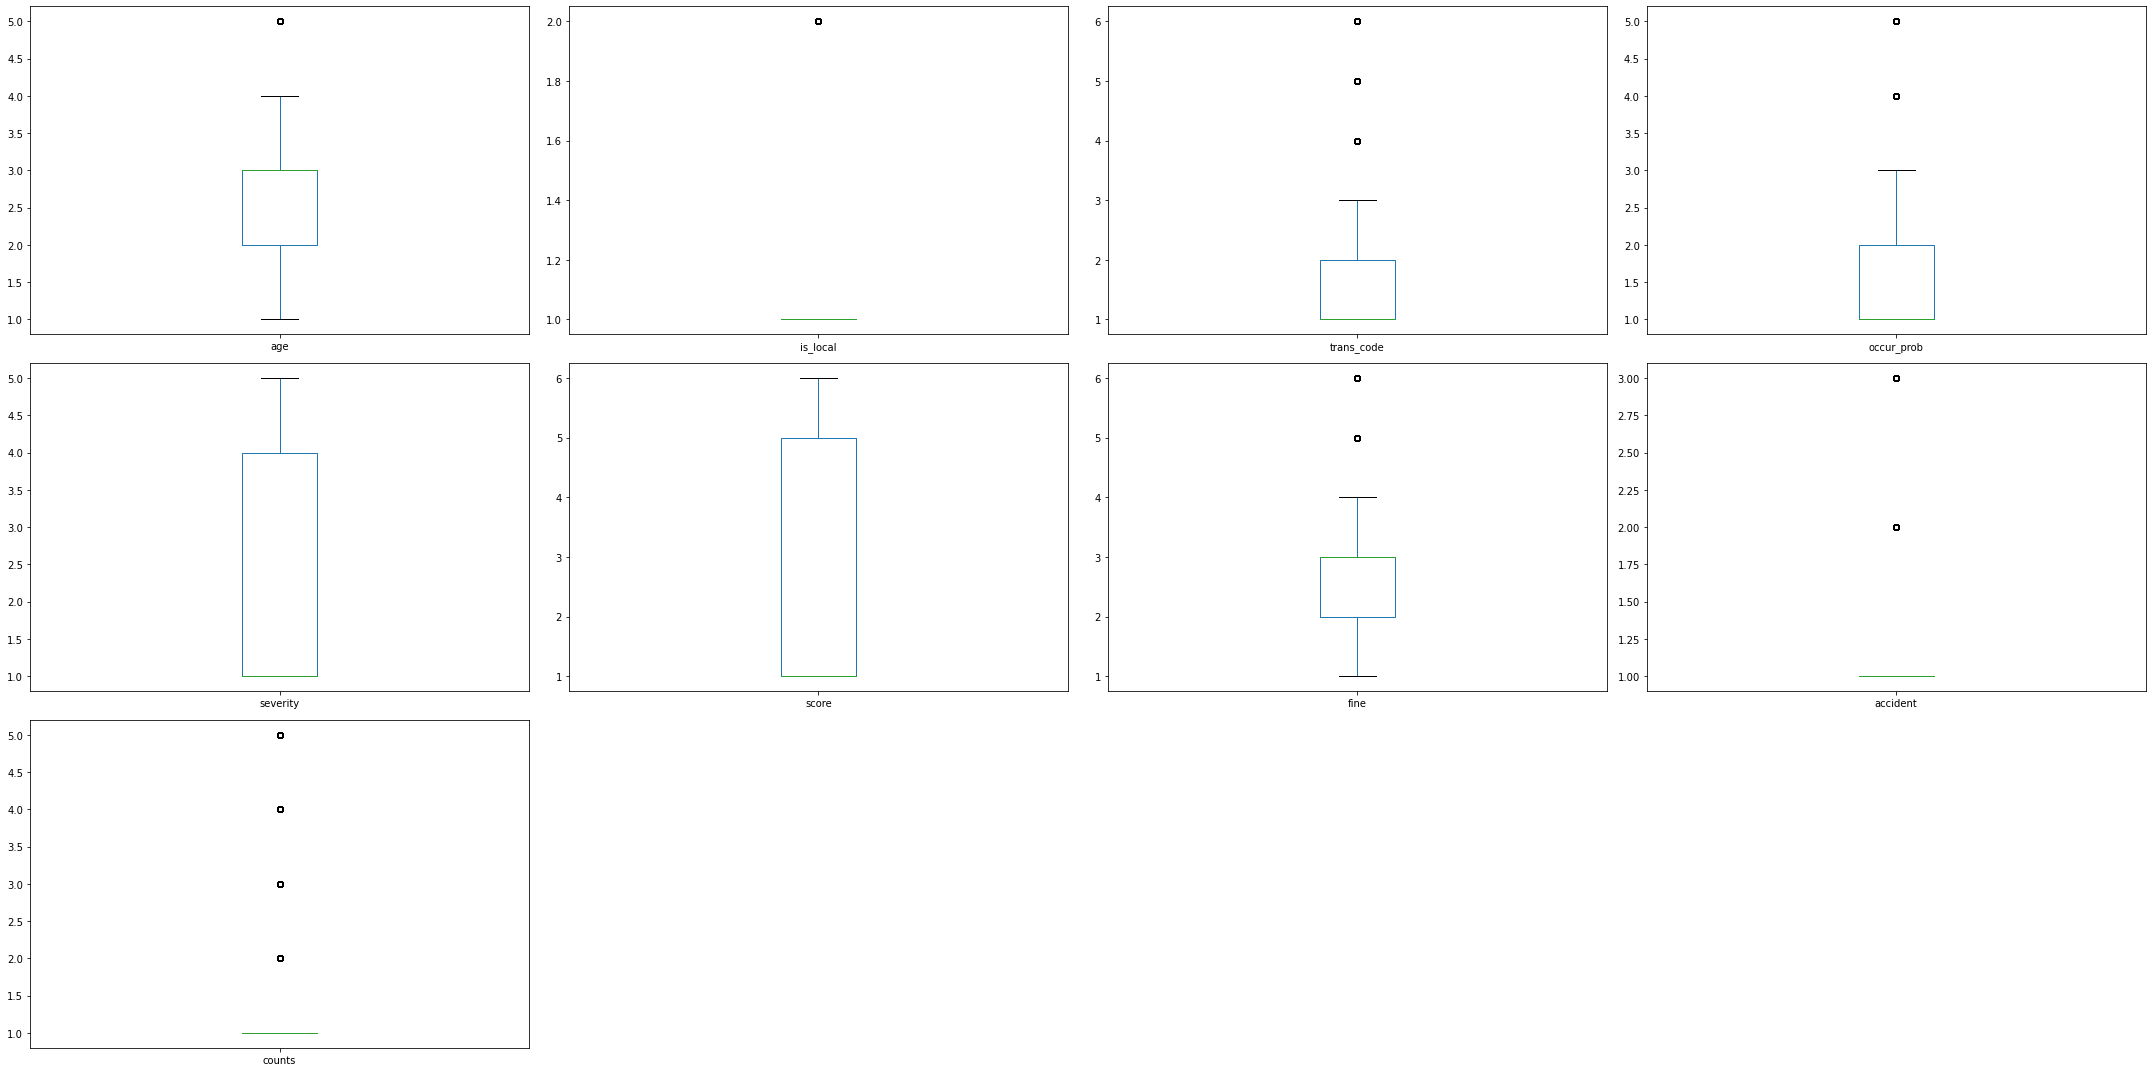

In [36]:
df_level.plot(kind='box', subplots=True, layout=(3, 4), sharex=False, sharey=False, figsize=(30, 15))
plt.tight_layout()

plt.show()

In [ ]:
df_level['counts'].value_counts()
print(df_level['score_mean'].value_counts())
print(df_level['fine_mean'].value_counts())
print(df_level['severity_mean'].value_counts())


In [67]:
df_level.to_csv("/Users/jiarui/Study/交通事故/data/cluster_level.csv")

In [66]:
df_vehicle[df_vehicle['违法行为_违法小类'] == '违法装载'][['违法行为记分数', '违法行为_违法描述', '违法行为罚款金额']]

print(df_vehicle[df_vehicle['违法行为_违法小类'] == '违法装载']['违法行为_违法描述'].value_counts())

print(
    df_vehicle[df_vehicle['违法行为_违法小类'] == '违反交通信号灯'][['违法行为_违法描述', '违法行为记分数', 'severity', 'occur_prob']].value_counts())

print(
    df_vehicle[df_vehicle['违法行为_违法小类'] == '违反交通信号'][['违法行为_违法描述', '违法行为记分数', 'severity', 'occur_prob']].value_counts())

机动车载货长度、宽度、高度超过规定的                         4490
机动车载物行驶时遗洒、飘散载运物的                          3333
驾驶载客汽车以外的其他机动车载人超过核定人数的                    2931
货运机动车驾驶室载人超过核定人数的                          1798
公路客运车辆以外的载客汽车违反规定载货的                       1353
货运机动车违反规定载人的                                853
驾驶营运客车（不包括公共汽车）、校车以外的载客汽车载人超过核定人数未达20%的     323
客运机动车违反规定载货的                                271
驾驶营运客车（不包括公共汽车）以外的其他载客汽车载人超过核定人数20％以上的      253
驾驶货车违反规定载客的                                 150
驾驶轻便摩托车载人的                                   45
拖拉机载人的                                       36
驾驶残疾人机动车违反规定载人的                              12
轻便摩托车载人（造成事故的）                                6
其他机动车载人超过核定人数的（造成事故的）                         6
持临时移动证上道路行驶的机动车载货或者载                          3
货运机动车违反规定载人的（造成事故的）                           2
驾驶电动自行车违反规定载人的                                2
Name: 违法行为_违法描述, dtype: int64
违法行为_违法描述          违法行为记分数  severity  occur_prob
驾驶机动车违反道路交通信号灯通行的  6.0      5.0       5.0           919
 

### 对聚类的结果进行统计分析
包括：
司机的年龄组成、司机的主要准驾车型、违章类型和违章描述

In [40]:
import matplotlib.pyplot as plt


# 输入的是一个df，主键是每个司机的驾驶证号id
# 得到这个司机群体的信息
def analyseDF(df_input):
    # 年龄组成
    ages = df_input['age'].value_counts()
    plt.subplot(2, 1, 1)
    df_input['age'].plot(kind='hist')
    plt.title("Count of age")

    # print(ages)
    # 外地or本地
    is_local = df_input['is_local'].value_counts()
    print(is_local)
    # 准驾车型
    trans_codes = df_input['机动车_交通方式说明'].value_counts()
    print(trans_codes.head(15))
    trans_codes = df_input['trans_code'].value_counts()
    print(trans_codes)

    driver_count = df_input['违法行为_违法小类'].value_counts()
    print(driver_count.head(15))

    driver_count = df_input['违法行为_违法描述'].value_counts()
    print(driver_count.head(15))

    # 计算违章时间段统计

    df_input['违法时间'] = pd.to_datetime(df_input['违法时间'])
    df_input['违法时间'] = pd.to_datetime(df_input['违法时间'])
    df_date = df_input.sort_values('违法时间')
    df_date = df_date.set_index('违法时间')
    # print(df_date.truncate(before='2019',after='2022-1').head())
    df_date_col = df_input['违法时间']
    df_date_col['hour'] = df_input['违法时间'].dt.hour
    df_date_col['minute'] = df_input['违法时间'].dt.minute
    a = df_date_col['hour'].value_counts().sort_index()
    plt.subplot(2, 1, 2)
    a.plot(kind='bar', x='Time')
    plt.title("Count of Time")
    plt.show()

In [ ]:
# list_ids = list(df_level['id'])
# list_analyse = ['当事人_驾驶证号', '机动车_交通方式说明', '违法行为_违法小类', '机动车_号牌号码', '违法时间', '违法行为_违法描述', 'trans_code', 'is_local', 'age',
#                 'score', 'fine', 'occur_prob', 'severity']
# df_analyse = df_vehicle[df_vehicle['当事人_驾驶证号'].isin(list_ids)][list_analyse]
# df_analyse['机动车_号牌号码'] = df_analyse['机动车_号牌号码'].str[0:2]
# df_analyse
#
# analyseDF(df_analyse)

In [54]:
df_cluster = pd.read_csv("/Users/jiarui/Study/交通事故/data/cluster_level_output.csv")

print(len(df_cluster))
print(df_cluster['QCL_1'].value_counts())
df_cluster['QCL_1'].astype('int64', errors='ignore')
print(len(df_cluster[df_cluster['QCL_1'] == '2']))

cluster_lable = 'QCL_2'
df_cluster['label'] = 0
df_cluster.loc[(df_cluster[cluster_lable] == '1') | (df_cluster[cluster_lable] == 1), 'label'] = 1
df_cluster.loc[(df_cluster[cluster_lable] == '2') | (df_cluster[cluster_lable] == 2), 'label'] = 2
df_cluster.loc[(df_cluster[cluster_lable] == '3') | (df_cluster[cluster_lable] == 3), 'label'] = 3
df_cluster.loc[(df_cluster[cluster_lable] == '4') | (df_cluster[cluster_lable] == 4), 'label'] = 4
df_cluster.loc[(df_cluster[cluster_lable] == '5') | (df_cluster[cluster_lable] == 5), 'label'] = 5
print(df_cluster['label'].value_counts())

119750
1    36398
5    35515
2    28833
3    12814
4     6186
         4
Name: QCL_1, dtype: int64
28833
5    35941
3    35221
4    27514
2    13296
1     7778
Name: label, dtype: int64


读取聚类结果 将结果分成k份，分别进行分析

---------------------------k = 1----------------------
共有违法者7778人
共有违法记录13409条
2    6861
1    6548
Name: is_local, dtype: int64
轻便二轮摩托车     3251
小型普通客车      1393
大型轮式拖拉机     1372
小型越野客车      1118
重型半挂牵引车     1084
小型轮式拖拉机      951
正三轮载货摩托车     864
中型普通客车       771
普通二轮摩托车      644
轻便正三轮摩托车     400
正三轮载客摩托车     295
微型轿车         284
手扶拖拉机        247
三轮汽车         194
普通正三轮摩托车     141
Name: 机动车_交通方式说明, dtype: int64
5    5595
4    3415
6    3105
3    1245
2      32
1      17
Name: trans_code, dtype: int64
违法上道路行驶     3494
违法装载        1954
无证驾驶        1694
违法停车        1524
饮酒驾驶         856
违反交通信号       786
未携带驾驶证       660
未按规定办理业务     568
不按规定使用灯光     413
违法占道行驶       412
违法变更车道       234
货动车辆超载       169
违法抢行         163
违法掉头         105
醉酒驾驶          81
Name: 违法行为_违法小类, dtype: int64
未取得驾驶证驾驶机动车的               1612
不按规定临时停车影响其他车辆和行人通行的       1276
机动车未按规定在限制、禁止的区域通行         1029
饮酒后驾驶机动车的                   824
上道路行驶的机动车未悬挂机动车号牌的          672
未随车携带驾驶证的                   642
机动车违反禁令标志指示的      

<ipython-input-40-b52943a23606>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date_col['hour'] = df_input['违法时间'].dt.hour


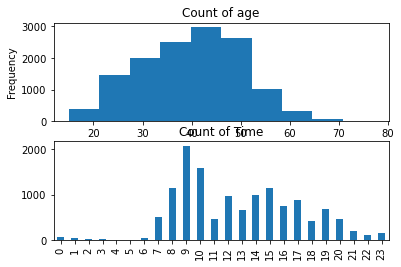

---------------------------k = 2----------------------
共有违法者13296人
共有违法记录15068条
1    12329
2     2739
Name: is_local, dtype: int64
小型轿车        8895
轻型栏板货车      2696
小型面包车        365
小型普通客车       362
轻便二轮摩托车      356
重型自卸货车       331
小型越野客车       321
重型半挂牵引车      289
轻型厢式货车       252
中型普通客车       154
轻型自卸货车       141
中型栏板货车       115
自卸低速货车       102
重型厢式货车        88
正三轮载货摩托车      84
Name: 机动车_交通方式说明, dtype: int64
1    9275
2    3981
4     857
5     536
3     318
6     101
Name: trans_code, dtype: int64
超速行驶       3883
饮酒驾驶       2793
违法抢行       2282
货动车辆超载     1927
逆行         1538
违法装载        922
未携带驾驶证      349
无证驾驶        250
违法上道路行驶     220
违法变更车道      143
违法超车        127
违法占道行驶      126
违反交通信号       98
违法会车         89
未低速通过        56
Name: 违法行为_违法小类, dtype: int64
饮酒后驾驶机动车的                                               2765
驾驶中型以上载客载货汽车、危险物品运输车辆以外的其他机动车行驶超过规定时速未达20%的             1953
遇前方机动车停车排队或者缓慢行驶时,借道超车或者占用对面车道、穿插等候车辆的                  1862
驾驶中型以上载客载货汽车、校车、危险物品运输车辆以外的其他机动车行驶超过规定时

<ipython-input-40-b52943a23606>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date_col['hour'] = df_input['违法时间'].dt.hour


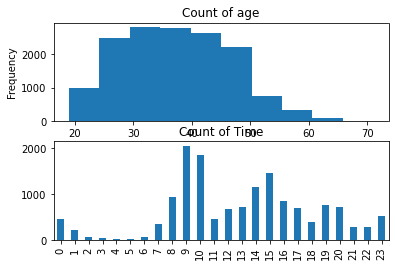

---------------------------k = 3----------------------
共有违法者35221人
共有违法记录44881条
1    34163
2    10718
Name: is_local, dtype: int64
小型轿车          22696
轻型栏板货车         8811
重型自卸货车         3240
重型半挂牵引车        2984
轻型厢式货车         1109
重型厢式货车          977
中型栏板货车          845
重型非载货专项作业车      782
小型面包车           718
重型仓栅式货车         668
自卸低速货车          554
轻型自卸货车          457
中型厢式货车          203
重型罐式货车          127
中型自卸货车          111
Name: 机动车_交通方式说明, dtype: int64
1    23435
2    18151
3     3279
4       14
6        2
Name: trans_code, dtype: int64
违法上道路行驶     19964
违法停车        18797
未按规定办理业务     1361
违反交通信号       1135
未携带驾驶证        776
违法倒车          566
违法占道行驶        517
违法装载          395
违法掉头          300
违法变更车道        285
未按规定让行        227
无证驾驶          138
违法抢行           93
不按规定使用灯光       88
货动车辆超载         35
Name: 违法行为_违法小类, dtype: int64
机动车未按规定在限制、禁止的区域通行                    16937
不按规定临时停车影响其他车辆和行人通行的                  16074
不按规定停放影响其他车辆和行人通行的                     1808
载货汽车、挂车未按照规定安装侧面及后下部

<ipython-input-40-b52943a23606>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date_col['hour'] = df_input['违法时间'].dt.hour


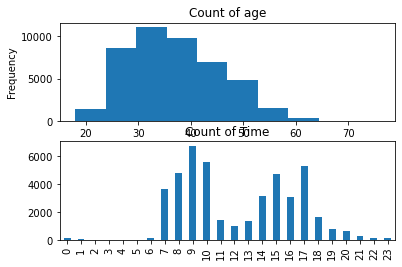

---------------------------k = 4----------------------
共有违法者27514人
共有违法记录36207条
1    27480
2     8727
Name: is_local, dtype: int64
小型轿车          13763
轻型栏板货车         9538
重型自卸货车         3512
重型半挂牵引车        1538
重型非载货专项作业车     1271
小型面包车          1054
轻型厢式货车         1006
中型栏板货车          950
自卸低速货车          597
轻型自卸货车          513
重型厢式货车          439
小型普通客车          324
重型仓栅式货车         276
小型越野客车          197
中型自卸货车          167
Name: 机动车_交通方式说明, dtype: int64
2    18779
1    14906
3     1799
4      699
5       22
6        2
Name: trans_code, dtype: int64
违法装载        11885
违法变更车道       7407
违法占道行驶       5137
不按规定使用灯光     3188
违法掉头         1999
违法上道路行驶      1104
违法停车         1093
违法抢行         1051
疲劳驾驶          804
醉酒驾驶          664
无证驾驶          440
未按规定办理业务      333
违反交通信号        298
未携带驾驶证        239
货动车辆超载        180
Name: 违法行为_违法小类, dtype: int64
变更车道时影响正常行驶的机动车的           6573
机动车载货长度、宽度、高度超过规定的         3656
机动车不在机动车道内行驶的              3267
机动车载物行驶时遗洒、飘散载运物的          2616
驾驶载客汽车以外的其他机动

<ipython-input-40-b52943a23606>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date_col['hour'] = df_input['违法时间'].dt.hour


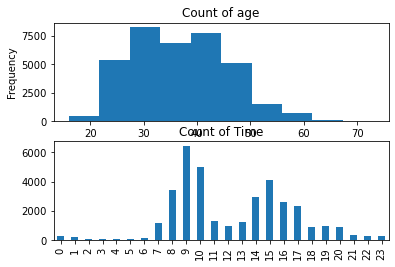

---------------------------k = 5----------------------
共有违法者35941人
共有违法记录48444条
1    40074
2     8370
Name: is_local, dtype: int64
小型轿车          21761
轻型栏板货车        14459
轻型厢式货车         2039
重型半挂牵引车        1987
重型厢式货车          992
小型面包车           826
重型自卸货车          813
中型栏板货车          724
重型仓栅式货车         632
小型普通客车          419
小型越野客车          410
轻便二轮摩托车         368
轻型自卸货车          361
重型非载货专项作业车      356
中型厢式货车          257
Name: 机动车_交通方式说明, dtype: int64
1    22675
2    21440
3     2146
4     1128
5     1008
6       47
Name: trans_code, dtype: int64
违反交通信号      25054
违法上道路行驶     11996
未携带驾驶证       3480
违法停车         1458
未按规定让行       1146
违反交通信号灯       899
违法装载          711
未按规定办理业务      677
货动车辆超载        610
违法变更车道        432
违法占道行驶        415
违法抢行          351
超速行驶          217
无证驾驶          217
逆行            200
Name: 违法行为_违法小类, dtype: int64
机动车违反禁令标志指示的                  16008
机动车违反禁止标线指示的                   4166
机动车未按照规定期限进行安全技术检验的            3892
未随车携带驾驶证的                      34

<ipython-input-40-b52943a23606>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date_col['hour'] = df_input['违法时间'].dt.hour


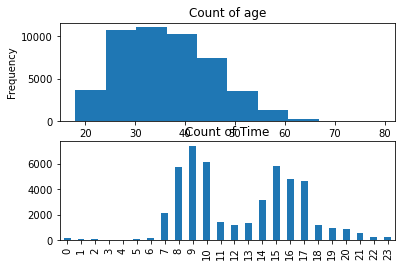

In [55]:
# k =5
for i in range(1, 6):
    print('---------------------------k = {}----------------------'.format(i))
    dfi = df_cluster[df_cluster['label'] == i]
    list_ids = list(dfi['id'])
    print('共有违法者{}人'.format(len(list_ids)))
    list_analyse = ['当事人_驾驶证号', '机动车_交通方式说明', '违法行为_违法小类', '机动车_号牌号码', '违法时间', '违法行为_违法描述', 'trans_code', 'is_local',
                    'age', 'severity']
    df_analyse = df_vehicle[df_vehicle['当事人_驾驶证号'].isin(list_ids)][list_analyse]
    print('共有违法记录{}条'.format(len(df_analyse)))
    df_analyse['机动车_号牌号码'] = df_analyse['机动车_号牌号码'].str[0:2]
    analyseDF(df_analyse)